<a href="https://colab.research.google.com/github/raviiraj13/100_days_of_Data_Science/blob/main/simple_imputer_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [6]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.isnull().mean()*100

,0
Age,20.786517
Fare,5.056180
Family,0.000000


In [9]:
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(strategy='mean')
imp2 = SimpleImputer(strategy='median')
imp1.fit(X_train)
X_train_imputed1=imp1.transform(X_train)
X_test_imputed1=imp1.transform(X_test)
imp2.fit(X_train)
X_train_imputed2=imp2.transform(X_train)
X_test_imputed2=imp2.transform(X_test)

In [10]:
X_train_imputed1 = pd.DataFrame(X_train_imputed1,columns=X_train.columns)
X_test_imputed1 = pd.DataFrame(X_test_imputed1,columns=X_test.columns)
X_train_imputed2 = pd.DataFrame(X_train_imputed2,columns=X_train.columns)
X_test_imputed2 = pd.DataFrame(X_test_imputed2,columns=X_test.columns)

In [11]:
X_train_imputed1.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


In [12]:
X_train_imputed1.isna().mean()*100

,0
Age,0.0
Fare,0.0
Family,0.0


In [26]:
X_train.corr()

,Age,Fare,Family
Age,1.000000,0.092644,-0.299113
Fare,0.092644,1.000000,0.208268
Family,-0.299113,0.208268,1.000000


In [27]:
X_train_imputed1.corr()

,Age,Fare,Family
Age,1.000000,0.086078,-0.244610
Fare,0.086078,1.000000,0.205499
Family,-0.244610,0.205499,1.000000


Text(0.5, 1.0, 'Imputed1')

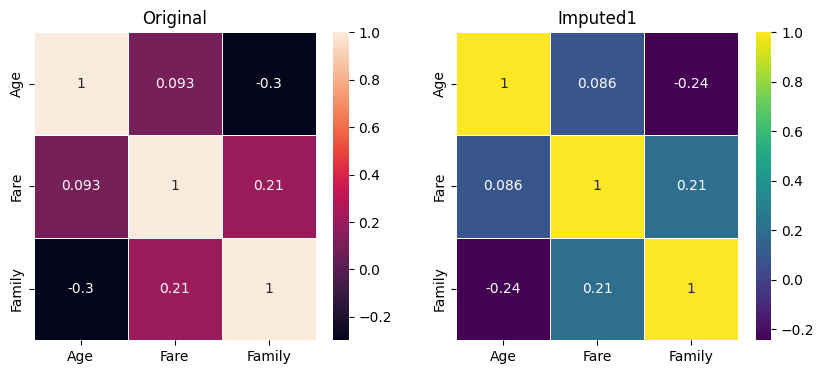

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(X_train.corr(),ax=axes[0], annot=True, linewidth=.5)

sns.heatmap(X_train_imputed1.corr(),ax=axes[1], annot=True, linewidth=.5,cmap='viridis')

axes[0].set_title('Original')
axes[1].set_title('Imputed1')

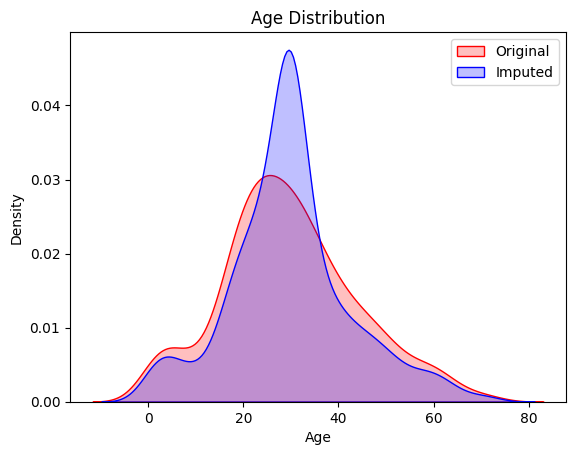

In [14]:
# sns.kdeplot(data1, color='blue', label='data1', fill=True)
# sns.kdeplot(data2, color='red', label='data2', fill=True)


# plt.show()

sns.kdeplot(data=X_train, x="Age",color='red', fill=True)
sns.kdeplot(data=X_train_imputed1, x="Age",color='blue', fill=True)
plt.legend(['Original', 'Imputed'])
plt.title('Age Distribution')
plt.show()


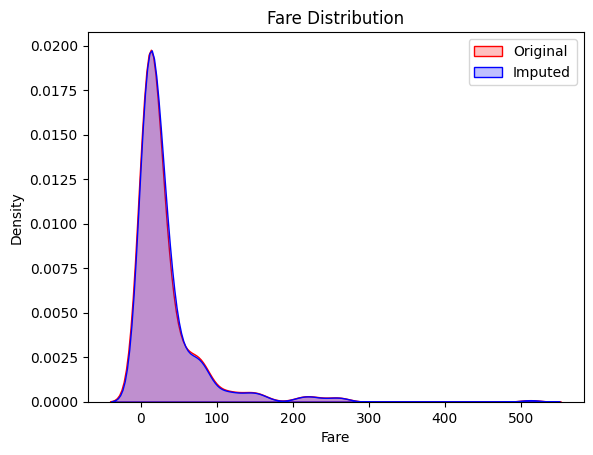

In [15]:

sns.kdeplot(data=X_train, x="Fare",color='red', fill=True)
sns.kdeplot(data=X_train_imputed1, x="Fare",color='blue', fill=True)
plt.legend(['Original', 'Imputed'])
plt.title('Fare Distribution')
plt.show()

Text(0.5, 1.0, 'Boxplot Age_Imputed')

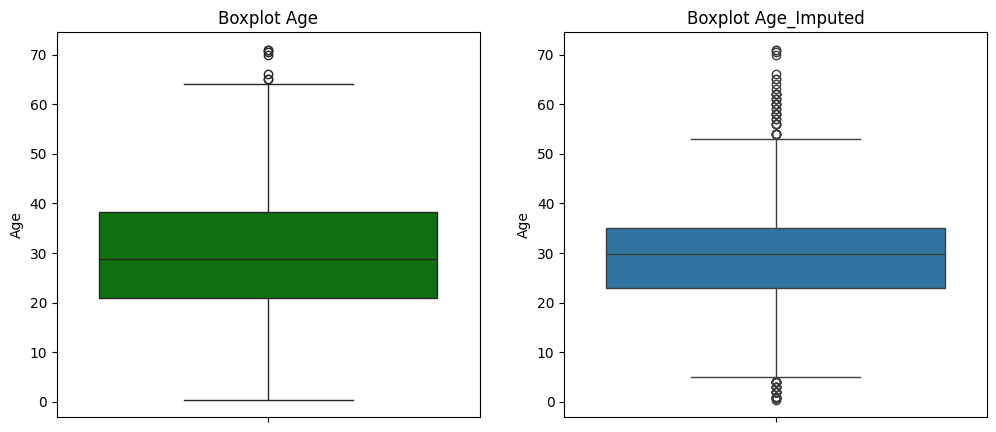

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='Age', data=X_train, ax=axes[0],color='green')
axes[0].set_title('Boxplot Age')

sns.boxplot(y='Age', data=X_train_imputed1, ax=axes[1])
axes[1].set_title('Boxplot Age_Imputed')

Text(0.5, 1.0, 'Boxplot Fare_Imputed')

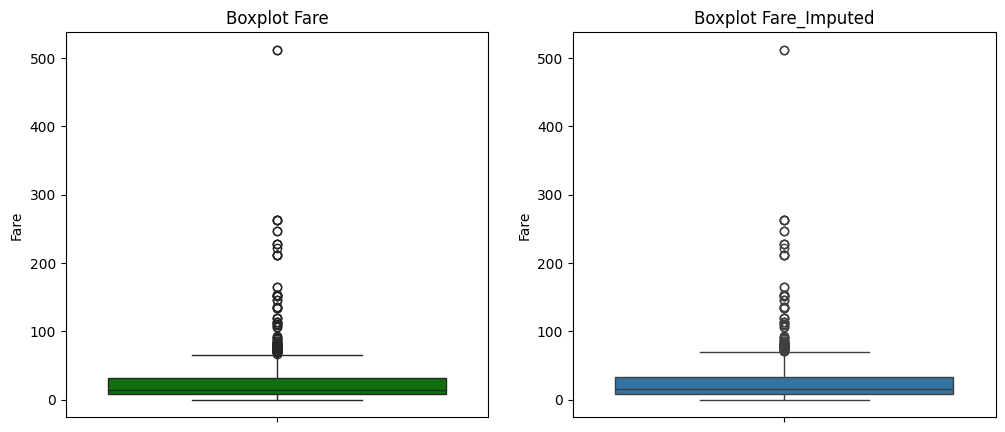

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='Fare', data=X_train, ax=axes[0],color='green')
axes[0].set_title('Boxplot Fare')

sns.boxplot(y='Fare', data=X_train_imputed1, ax=axes[1])
axes[1].set_title('Boxplot Fare_Imputed')

#For imputer 2

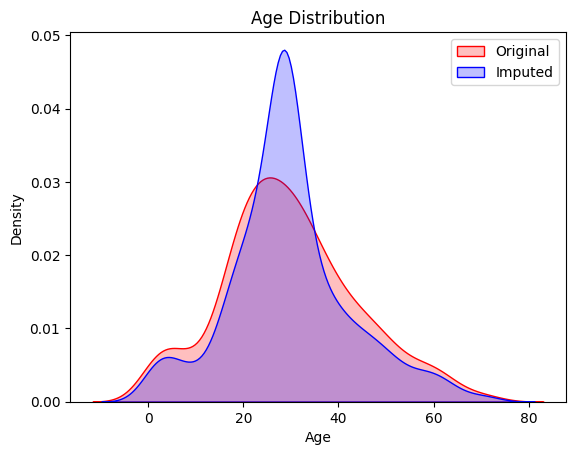

In [18]:

sns.kdeplot(data=X_train, x="Age",color='red', fill=True)
sns.kdeplot(data=X_train_imputed2, x="Age",color='blue', fill=True)
plt.legend(['Original', 'Imputed'])
plt.title('Age Distribution')
plt.show()


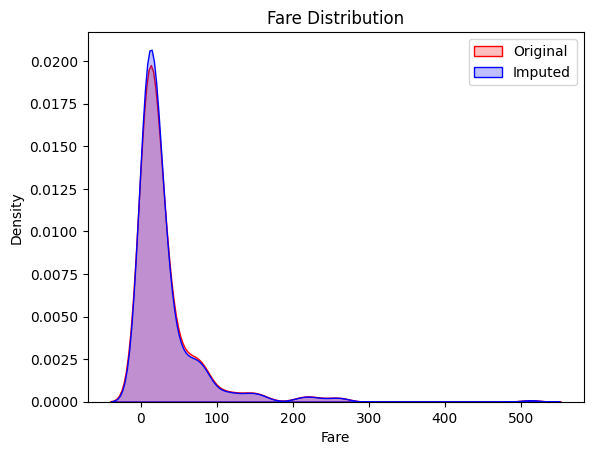

In [19]:

sns.kdeplot(data=X_train, x="Fare",color='red', fill=True)
sns.kdeplot(data=X_train_imputed2, x="Fare",color='blue', fill=True)
plt.legend(['Original', 'Imputed'])
plt.title('Fare Distribution')
plt.show()

Text(0.5, 1.0, 'Boxplot Age_Imputed')

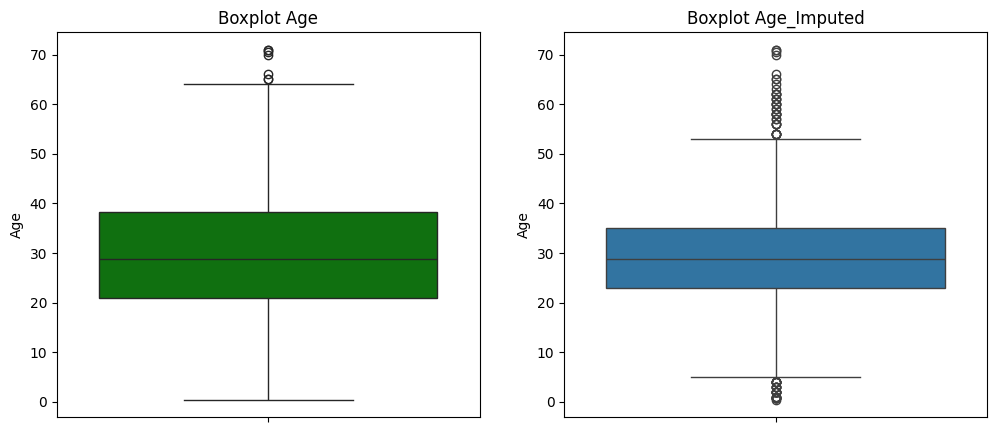

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='Age', data=X_train, ax=axes[0],color='green')
axes[0].set_title('Boxplot Age')

sns.boxplot(y='Age', data=X_train_imputed2, ax=axes[1])
axes[1].set_title('Boxplot Age_Imputed')

Text(0.5, 1.0, 'Boxplot Fare_imputed')

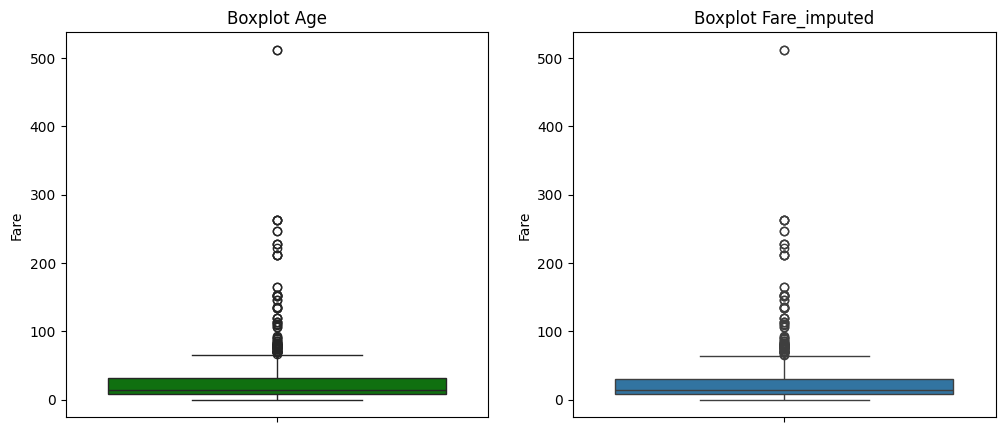

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='Fare', data=X_train, ax=axes[0],color='green')
axes[0].set_title('Boxplot Age')

sns.boxplot(y='Fare', data=X_train_imputed2, ax=axes[1])
axes[1].set_title('Boxplot Fare_imputed')

In [22]:
X_train_imputed1.isnull().sum()
X_test_imputed1.isnull().sum()

,0
Age,0
Fare,0
Family,0
